In [1]:
import torch
import numpy as np
from utils.rays import *
from models.network import NeRF
import matplotlib.pyplot as plt

import math

In [2]:
model_path = "/home/tanmay/Desktop/Learning/train_nerf/checkpoints_10k/checkpoint_epoch_3267_0.577.pth"

model = NeRF()  # Replace with your actual NeRF model class

# Load the state_dict into the model
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint['model_state_dict'])  # If the model is saved with this key

# Ensure the model is in evaluation mode if you're testing
model.eval()

NeRF(
  (layer1): Linear(in_features=39, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=4, bias=True)
)

In [3]:
device = torch.device("cpu")

In [4]:
data_pth = "/home/tanmay/Desktop/Learning/train_nerf/data/tiny_nerf_data.npz"

data = np.load(data_pth)

In [5]:
images = data['images']
poses = data['poses']
focal = data['focal']


In [6]:
test_id = 1

In [7]:
input_dummy = torch.tensor(np.ones_like(torch.tensor(images[test_id]).unsqueeze(0)))
pose = torch.tensor(poses[test_id]).unsqueeze(0)
focal = torch.tensor(focal).unsqueeze(0)

In [28]:
with torch.no_grad():
    ray_direction, ray_origins, depth_vals, query_points = compute_rays(img, pose, focal, 2, 5, 10, device)
    print(query_points)
    output = model(position_encoding(query_points.view(-1, query_points.shape[-1]), 6))
    output, _, _ = render(output, query_points, ray_origins, depth_vals)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    img = images[test_id]
    output = output.squeeze(0).numpy()
    # Display the first image
    ax[0].imshow(img)
    ax[0].set_title('Ground Truth')
    ax[0].axis('off')  # Hide the axes

    # Display the second image
    ax[1].imshow(output)
    ax[1].set_title('Model Prediction')
    ax[1].axis('off')  # Hide the axes

    # Show the plot
    plt.show()

ValueError: not enough values to unpack (expected 4, got 3)

In [22]:
print(pose)

tensor([[[-9.3054e-01,  1.1708e-01, -3.4696e-01, -1.3987e+00],
         [-3.6618e-01, -2.9751e-01,  8.8170e-01,  3.5542e+00],
         [ 7.4506e-09,  9.4751e-01,  3.1972e-01,  1.2888e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]]])


In [8]:
x,y,z = pose[0,0:3,-1]

print(x)

tensor(-1.3987)


In [9]:
radius = math.hypot(x,y)
num_poses = 10

# Generate a series of angles around the circle (0 to 2*pi)
angles = torch.linspace(0, 2 * np.pi, num_poses)

# Initialize an empty list to store the trajectory of poses
trajectory = []

# Loop through each angle to generate the new poses
for angle in angles:
    new_x = radius * torch.cos(angle)
    new_y = radius * torch.sin(angle)
    
    # Copy the original pose and replace the translation part (x, y, z)
    new_pose = pose.clone()
    new_pose[0, 0, 3] = new_x
    new_pose[0, 1, 3] = new_y
    new_pose[0, 2, 3] = z  # Keep the z component constant
    
    # Append the new pose to the trajectory
    trajectory.append(new_pose)

# Convert trajectory to a tensor for further use
trajectory = torch.stack(trajectory)

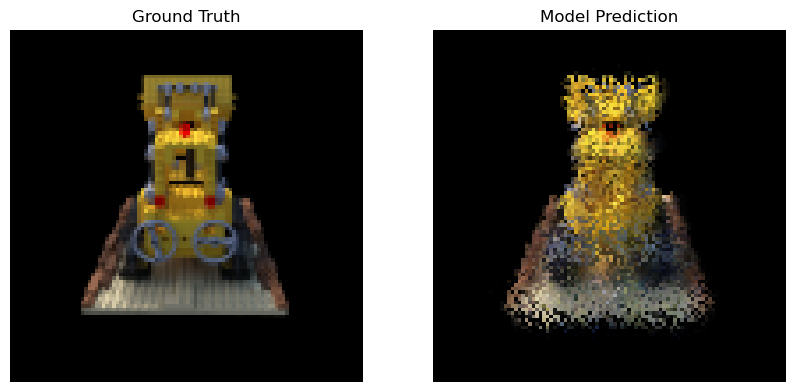

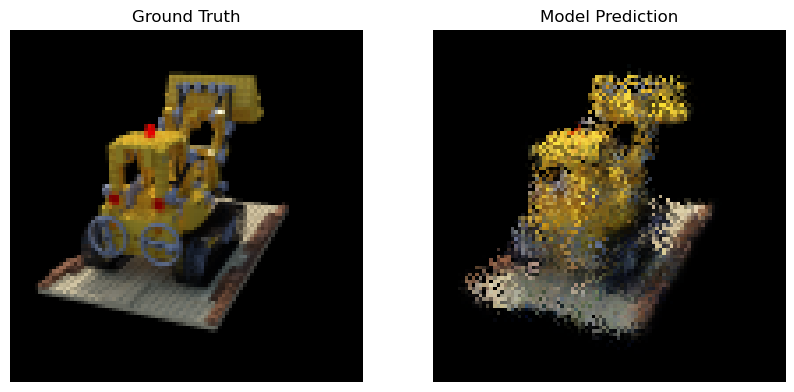

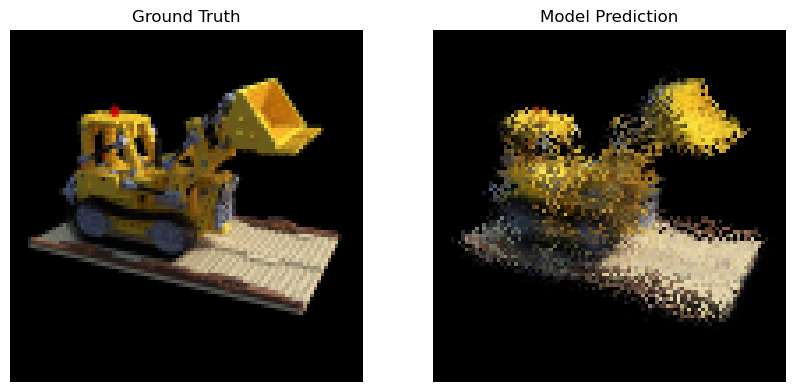

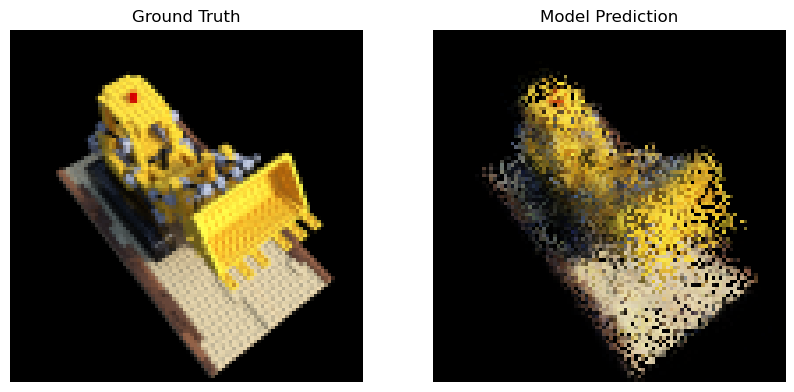

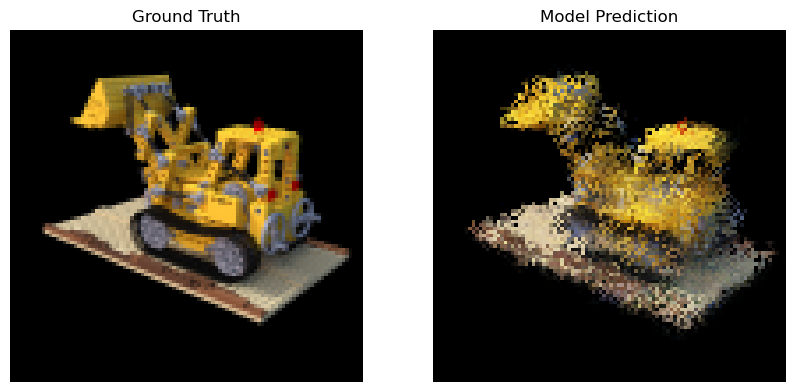

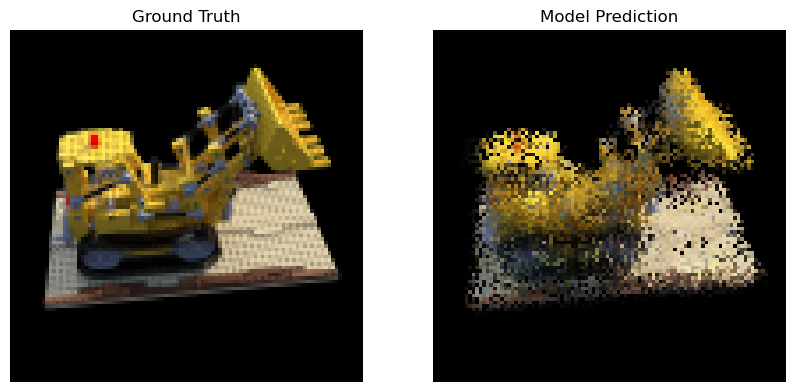

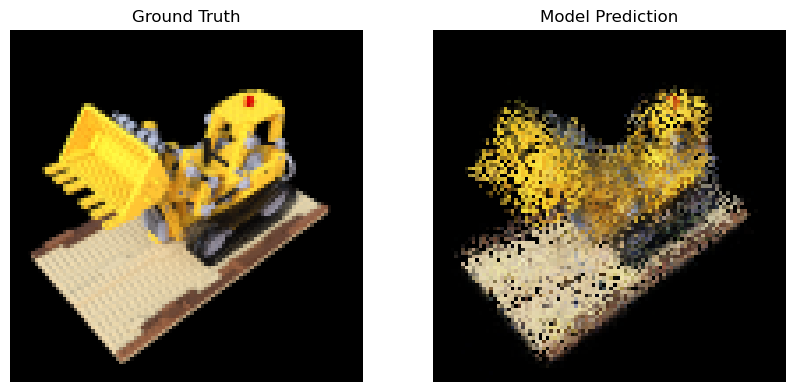

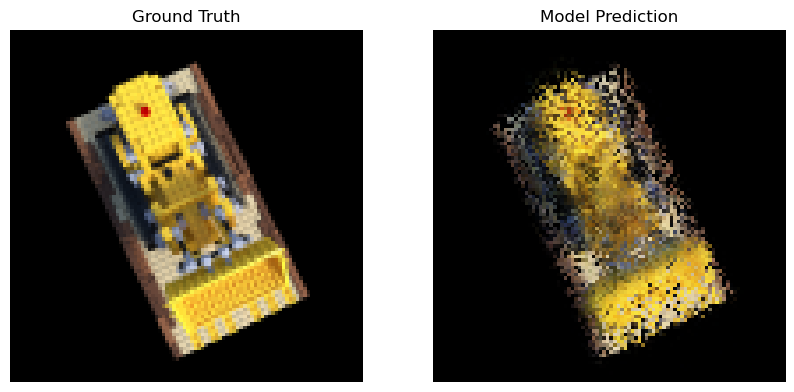

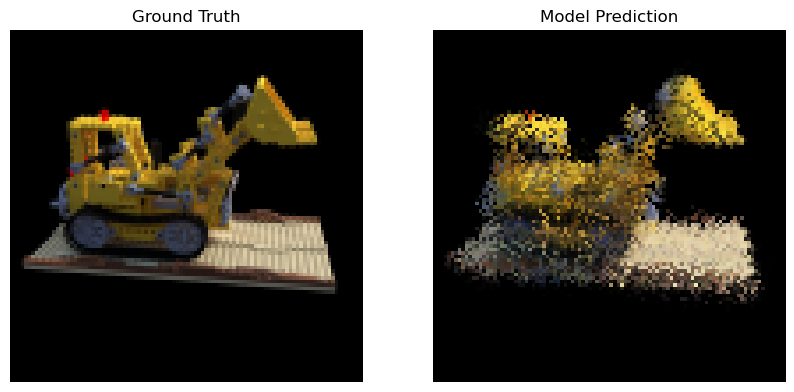

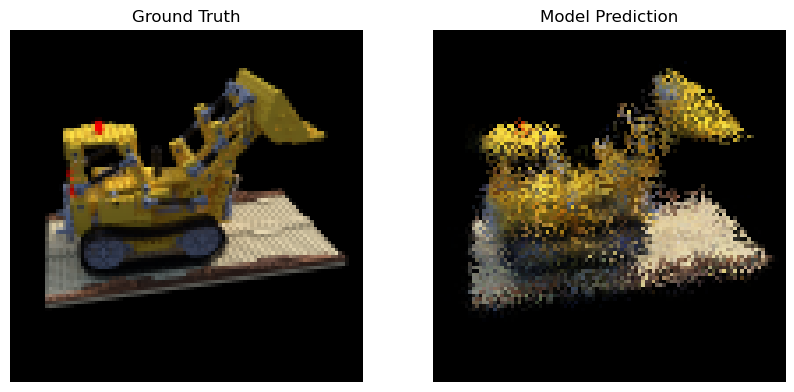

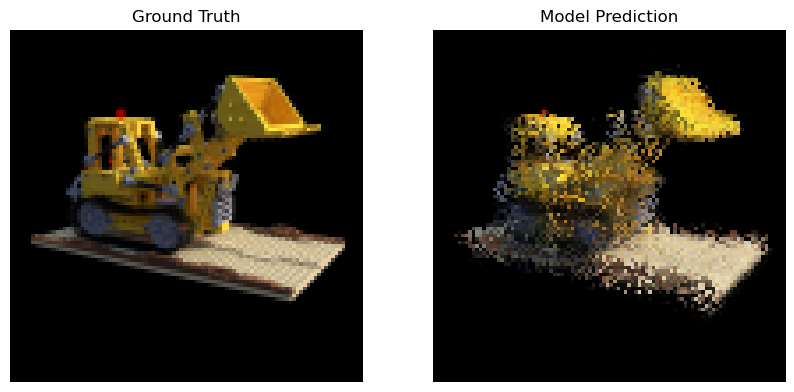

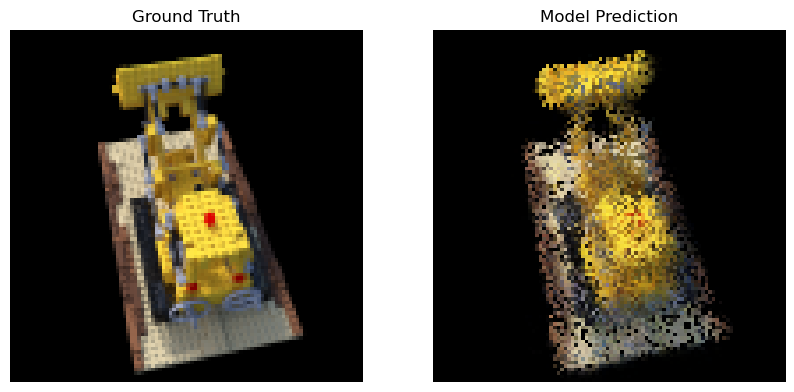

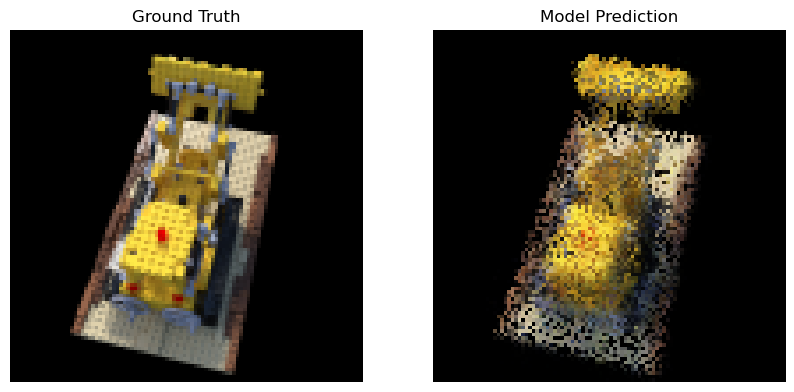

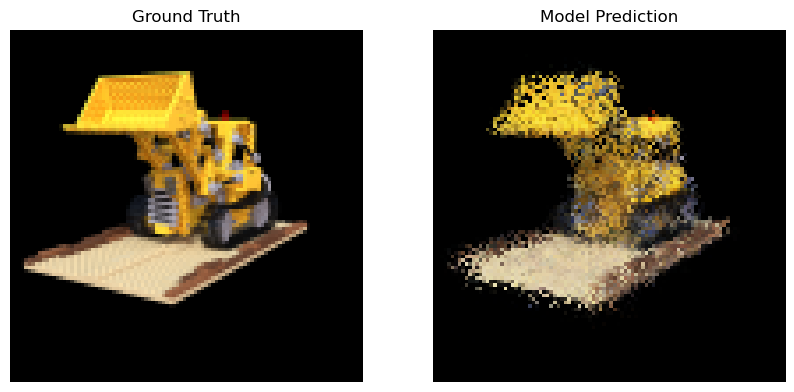

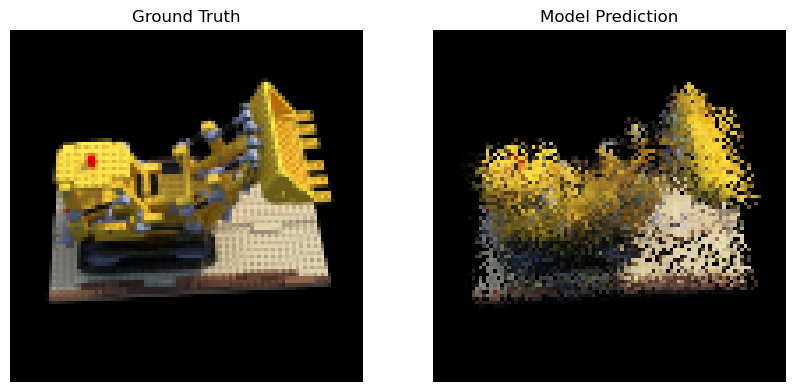

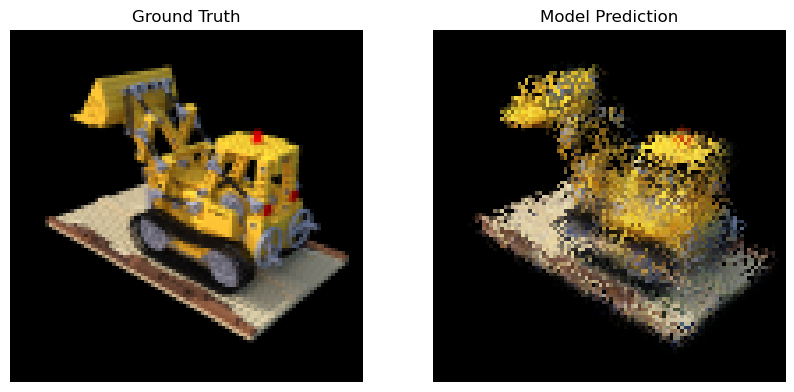

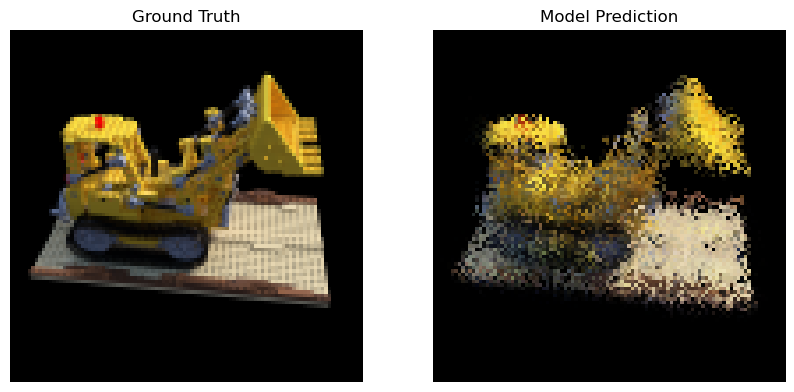

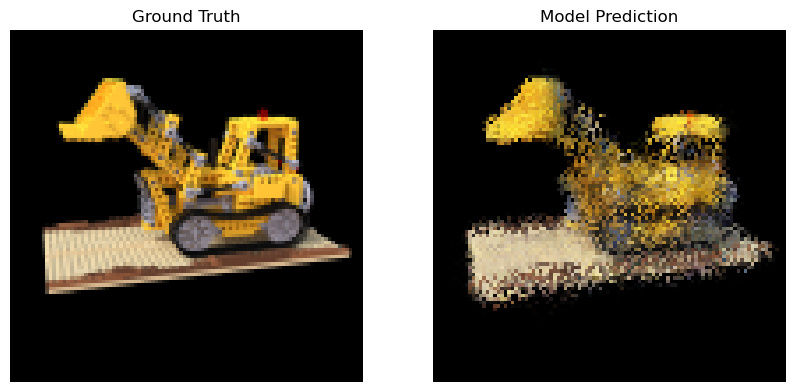

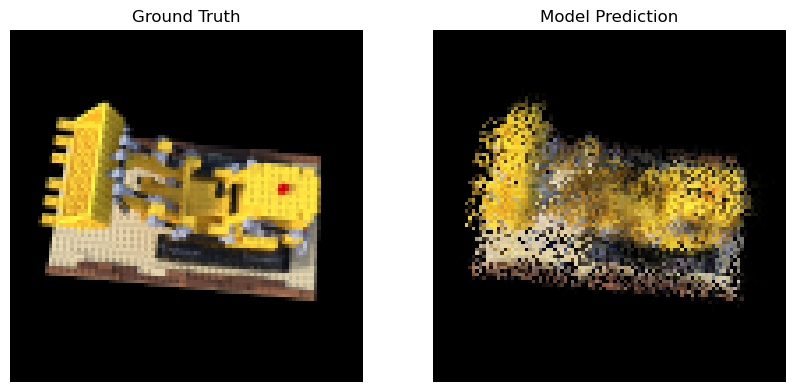

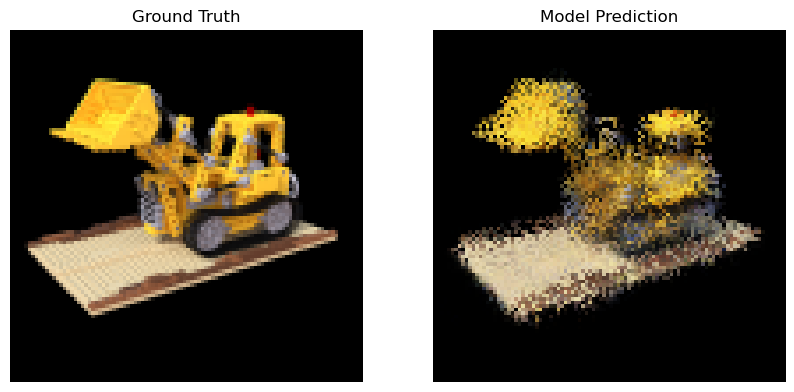

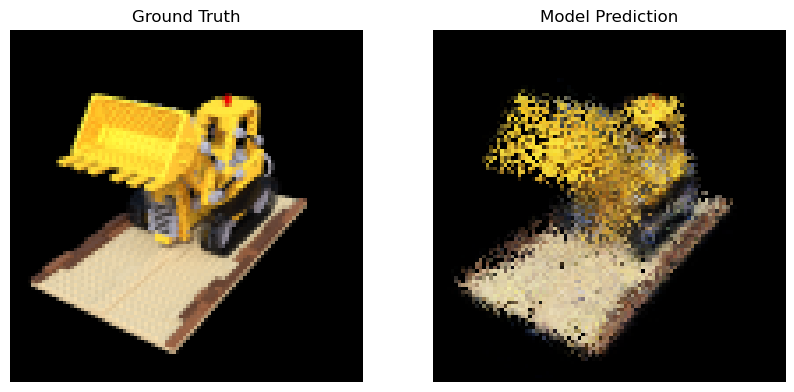

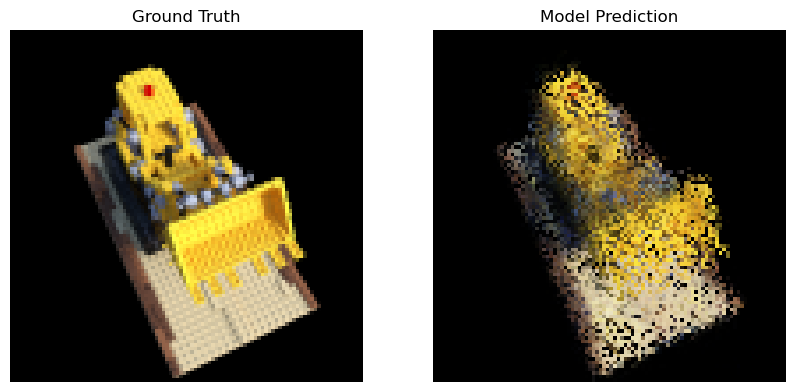

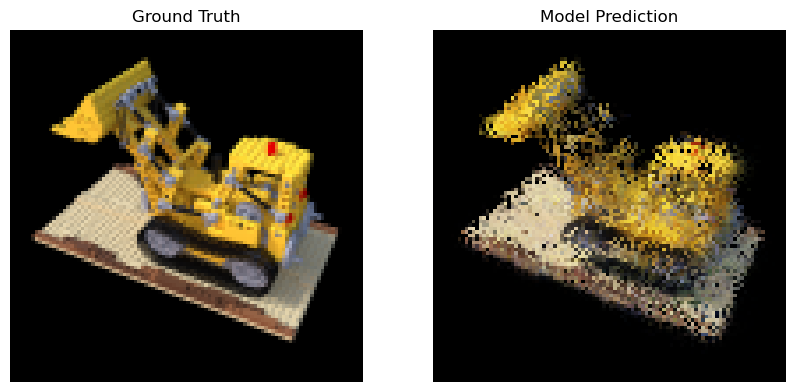

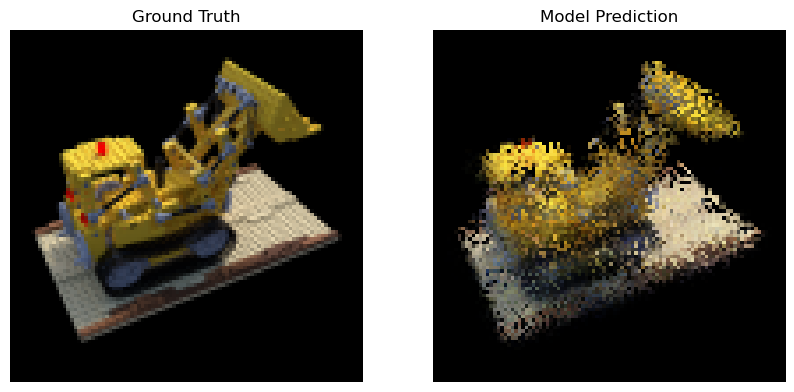

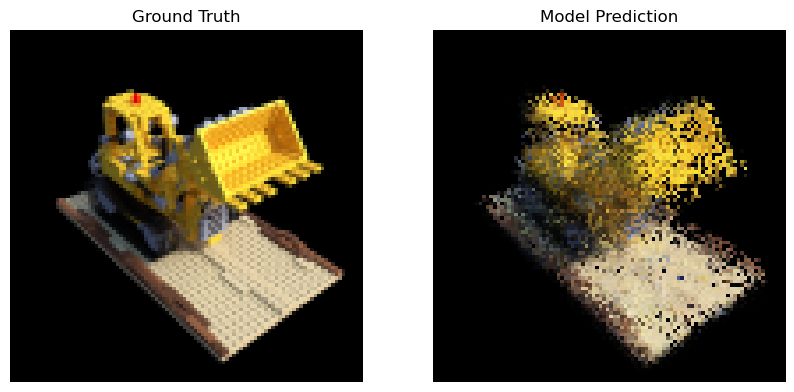

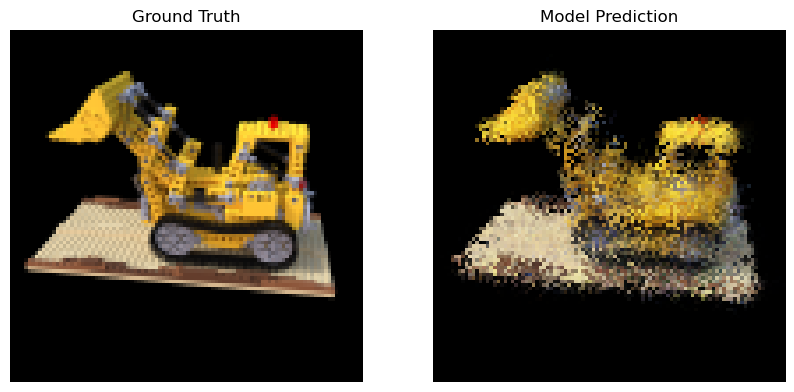

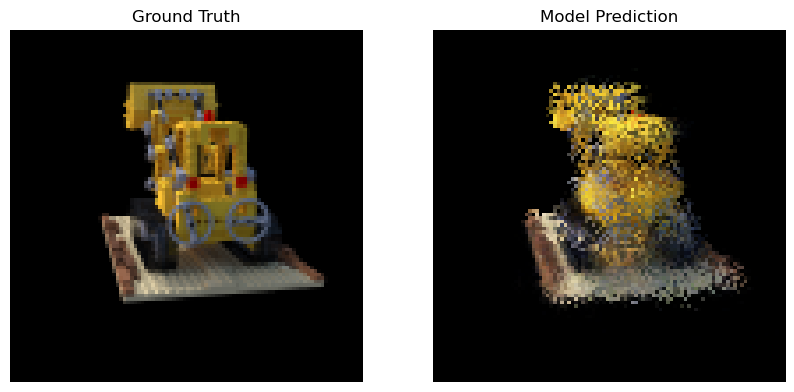

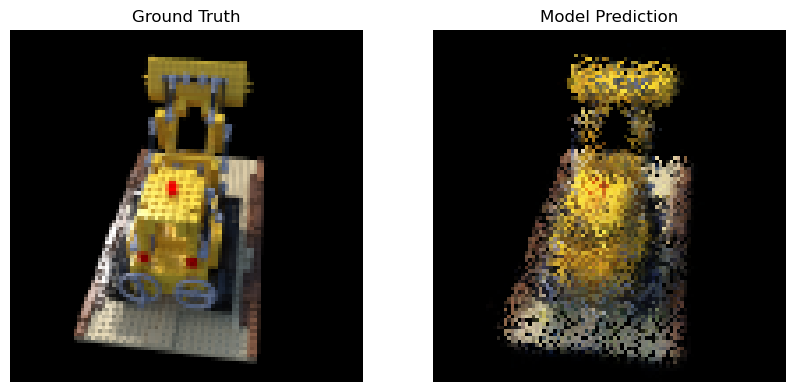

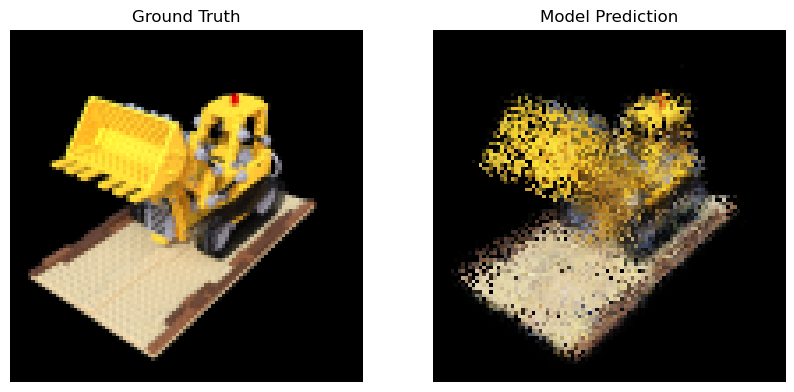

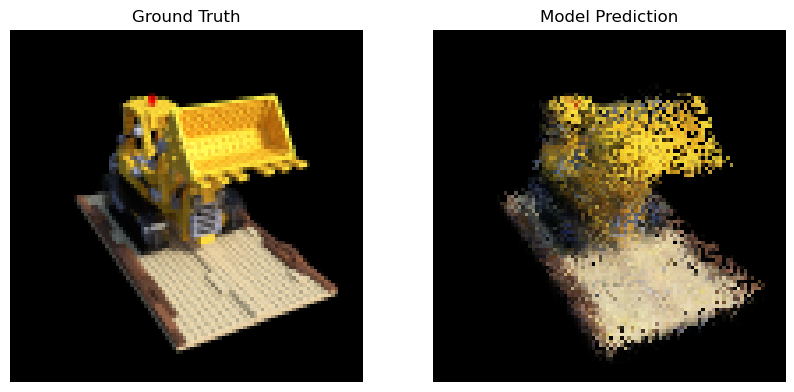

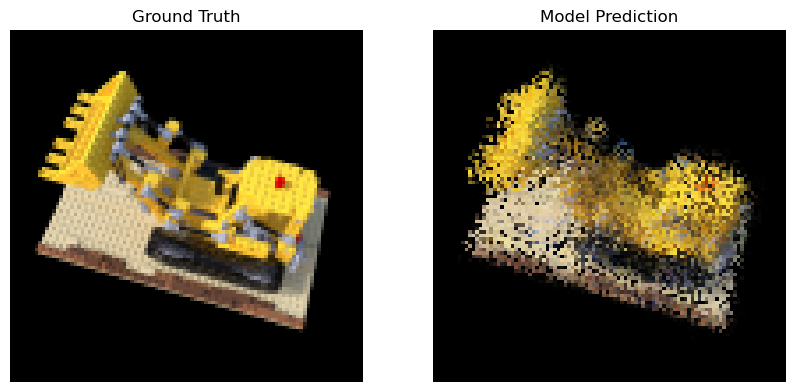

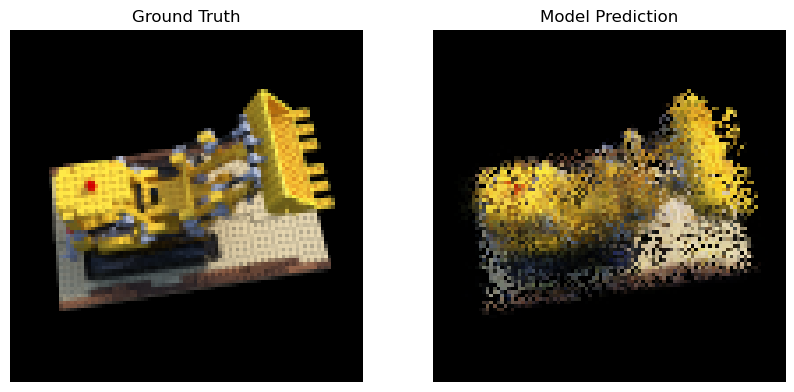

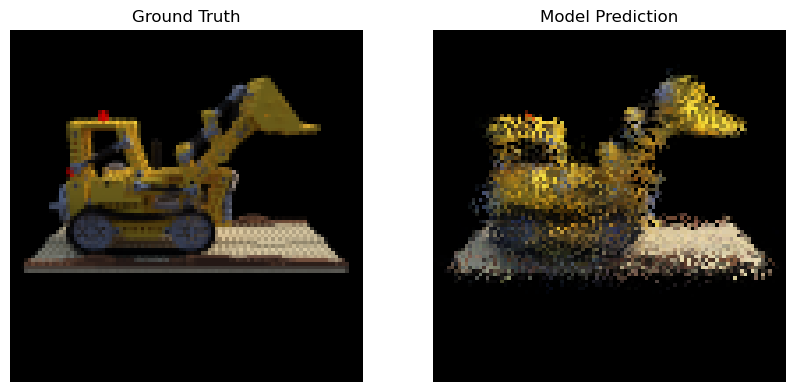

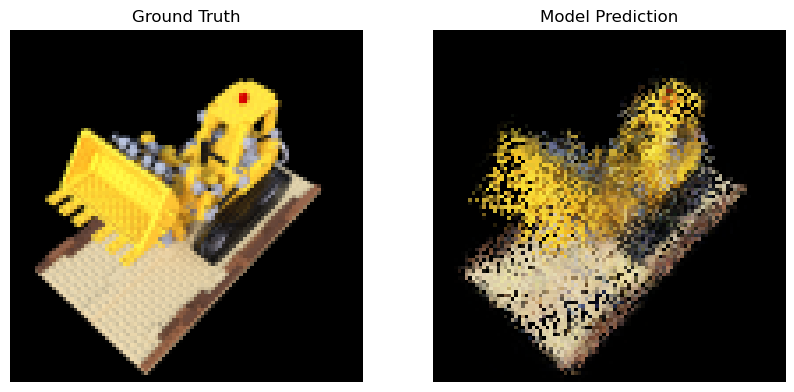

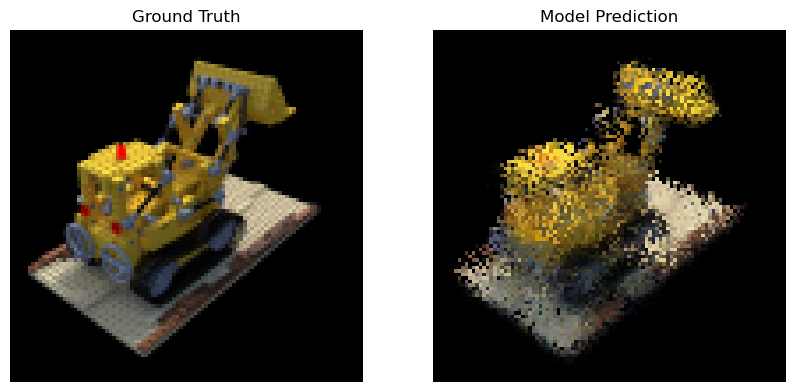

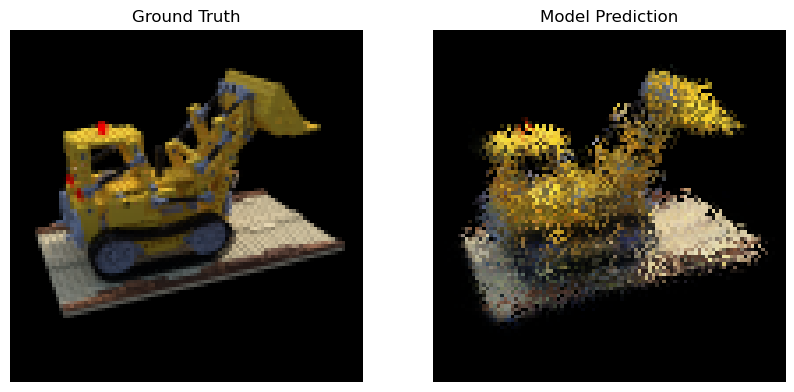

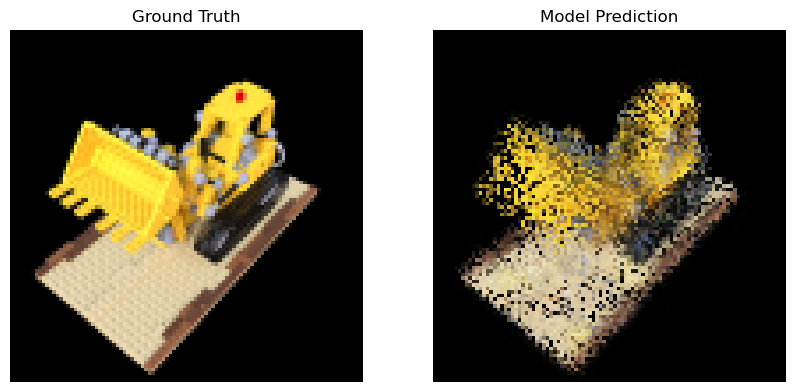

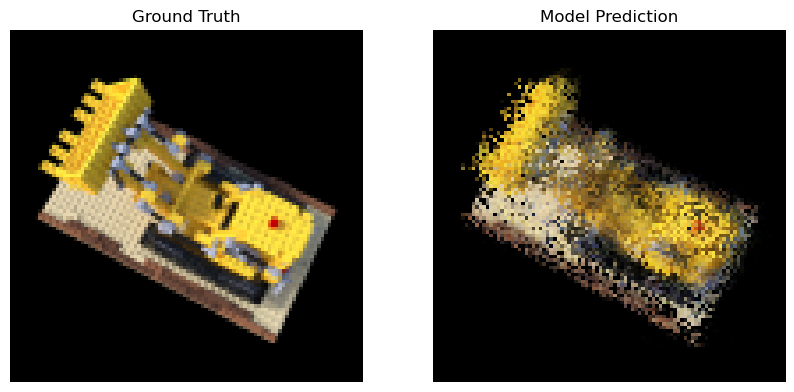

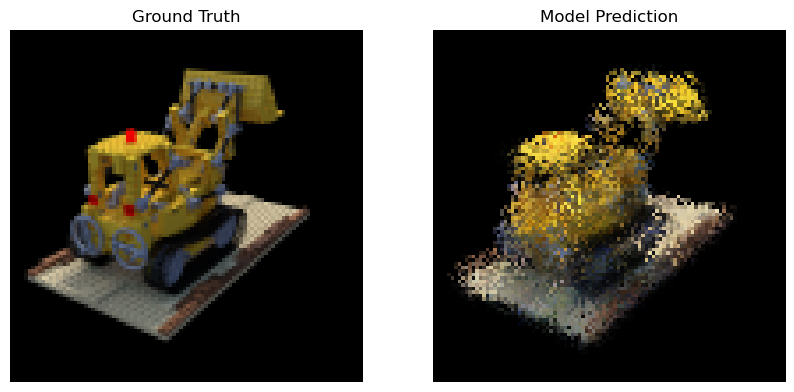

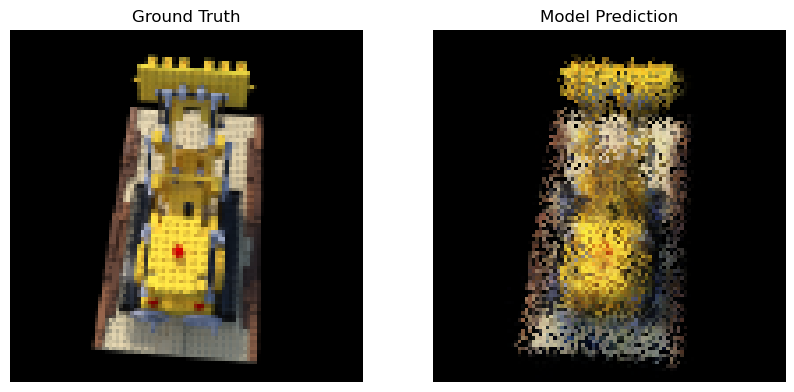

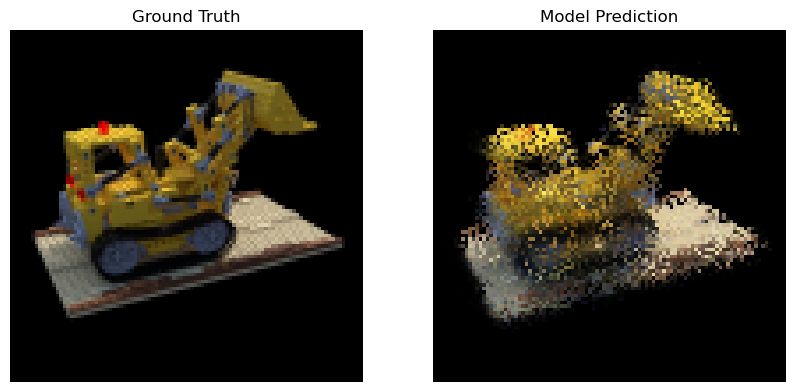

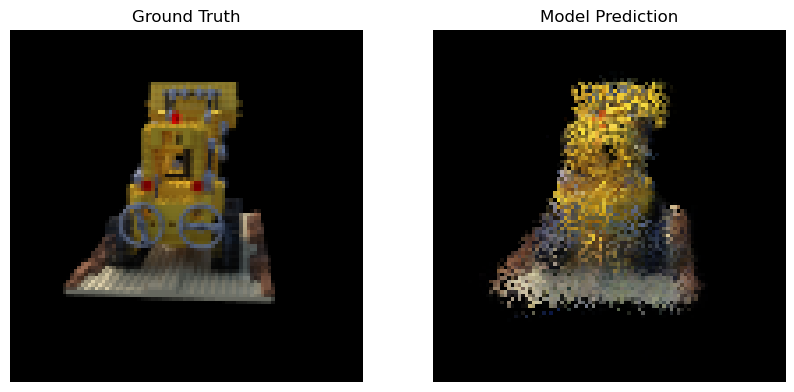

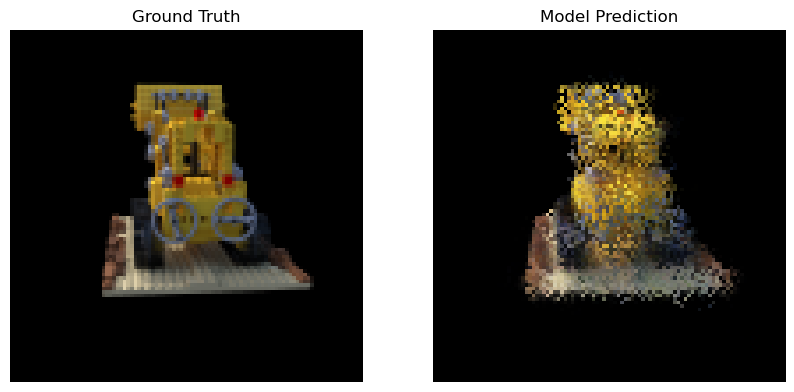

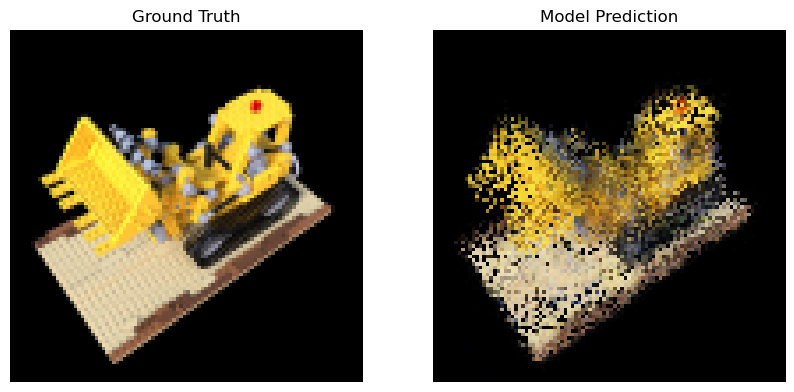

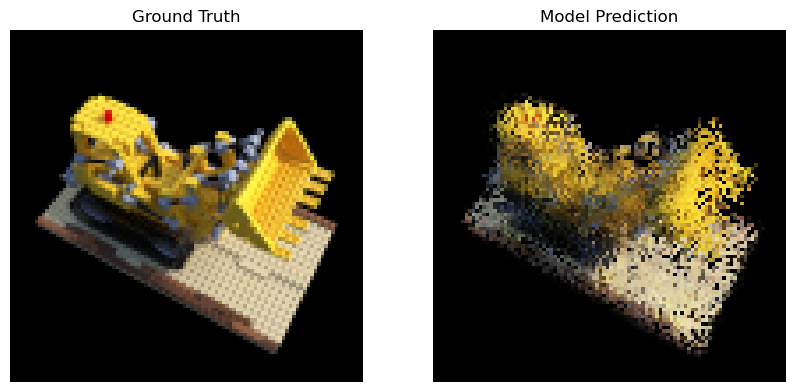

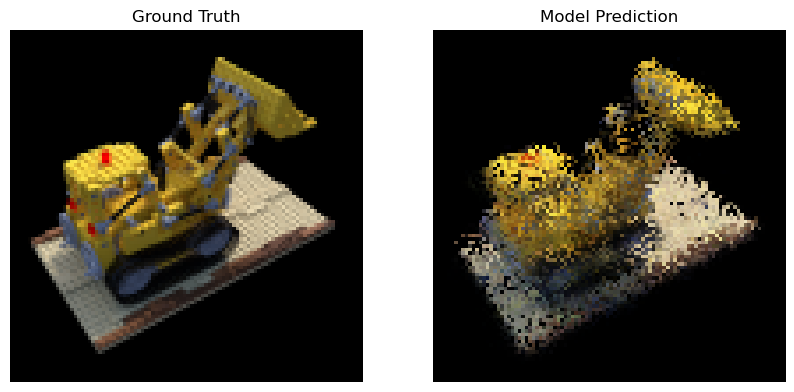

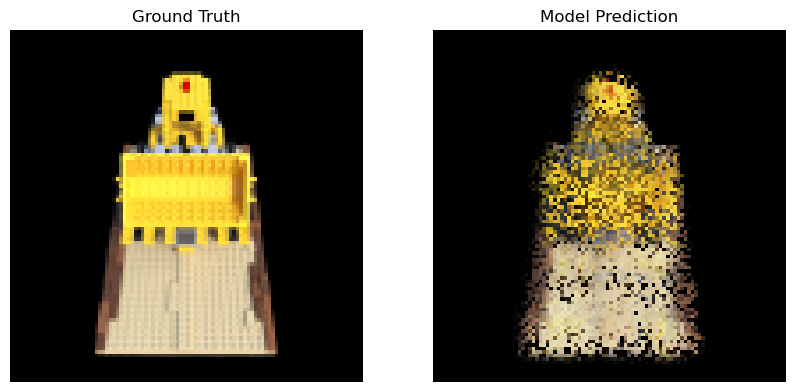

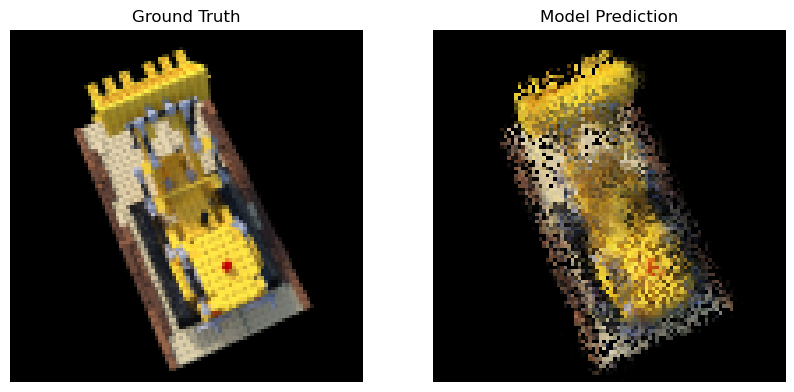

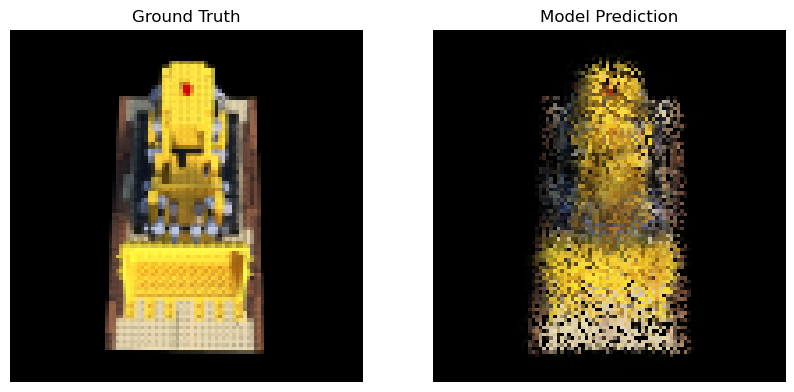

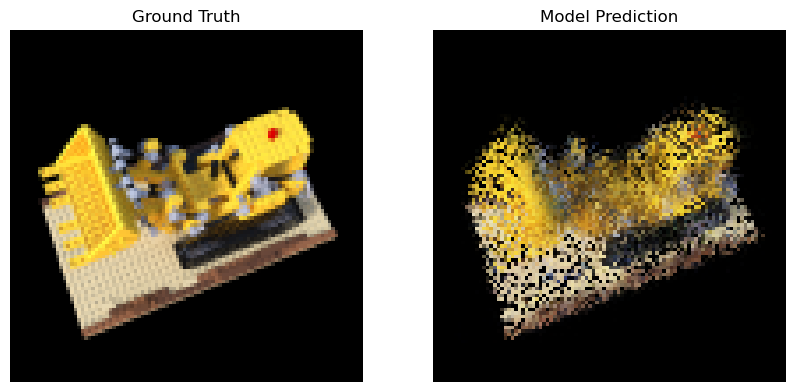

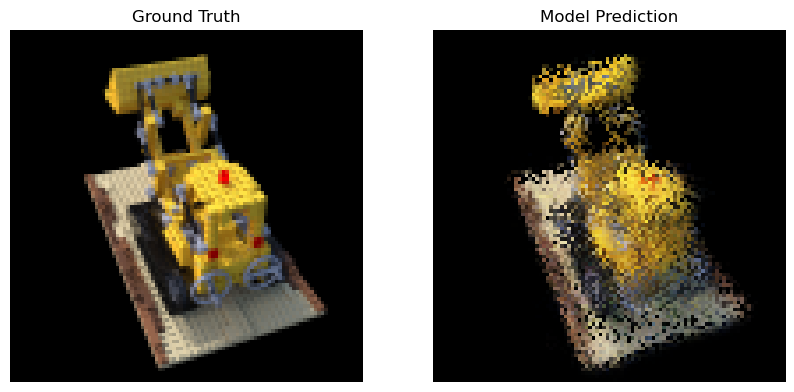

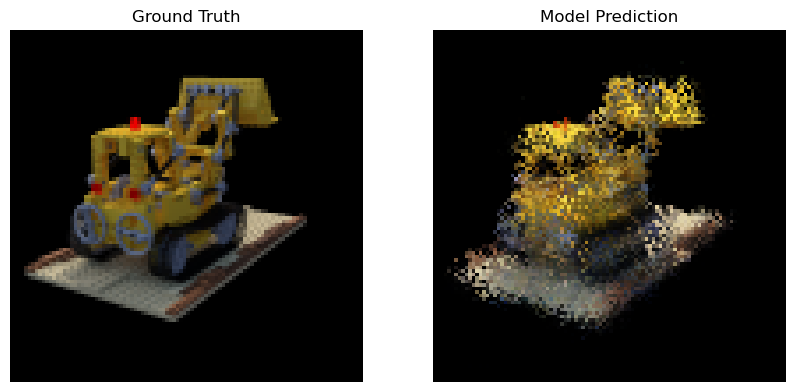

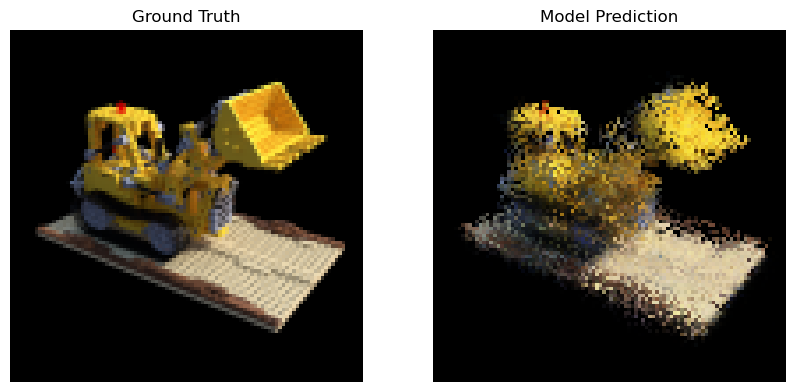

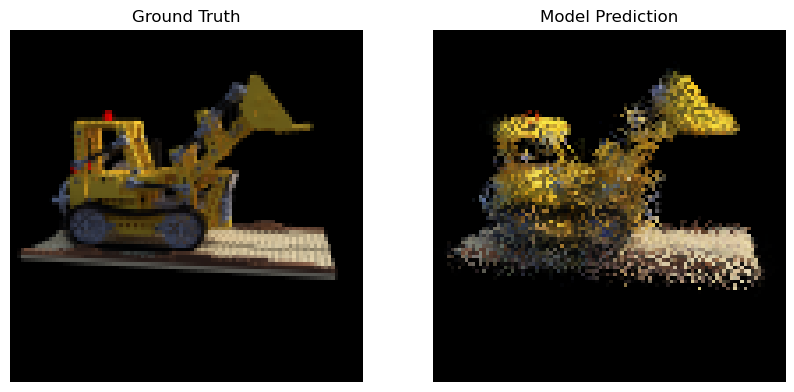

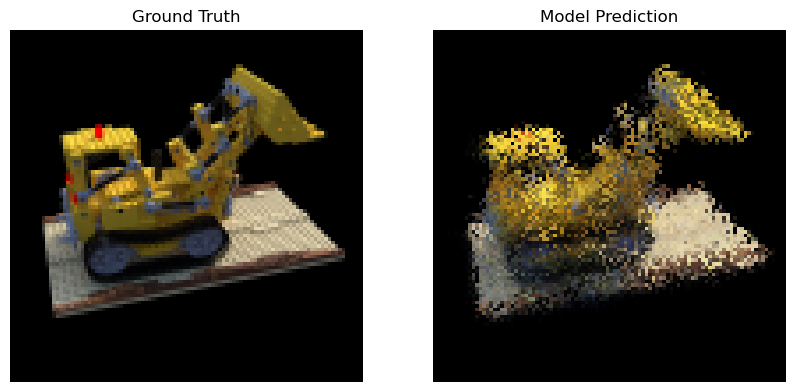

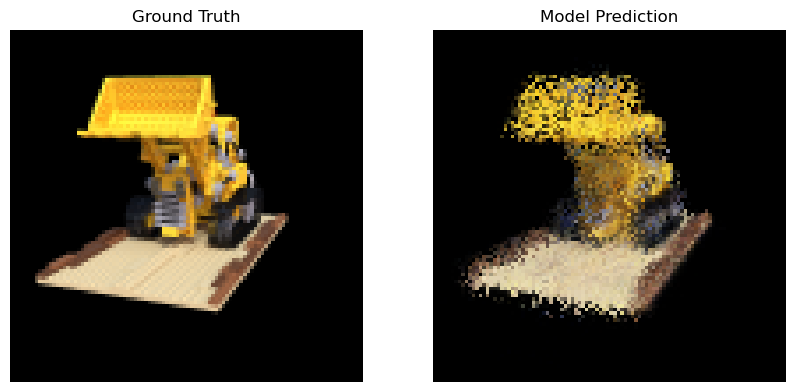

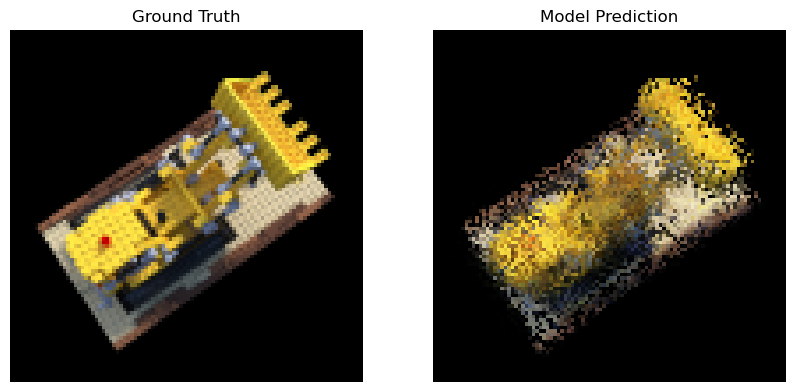

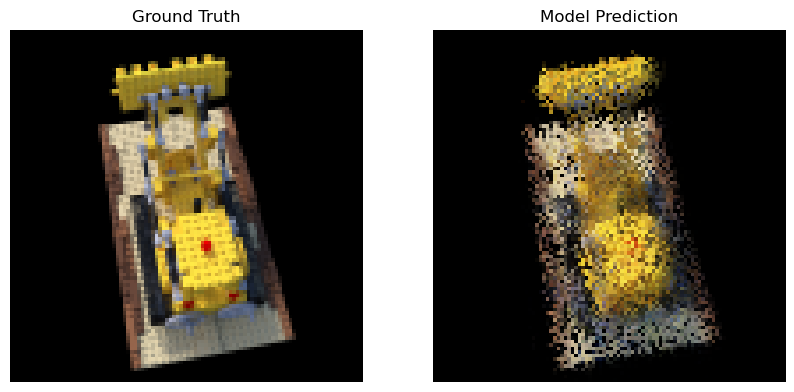

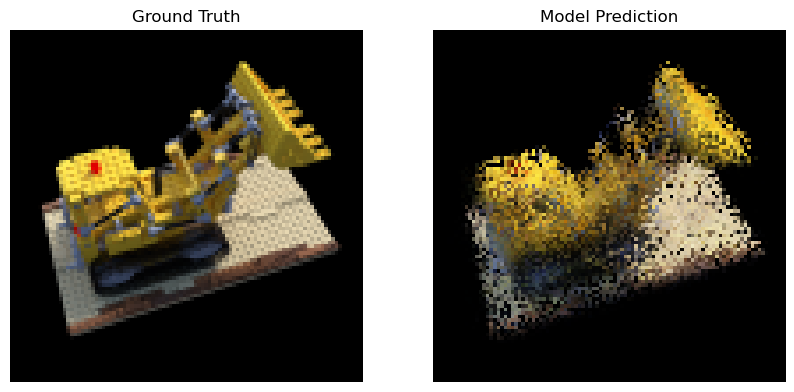

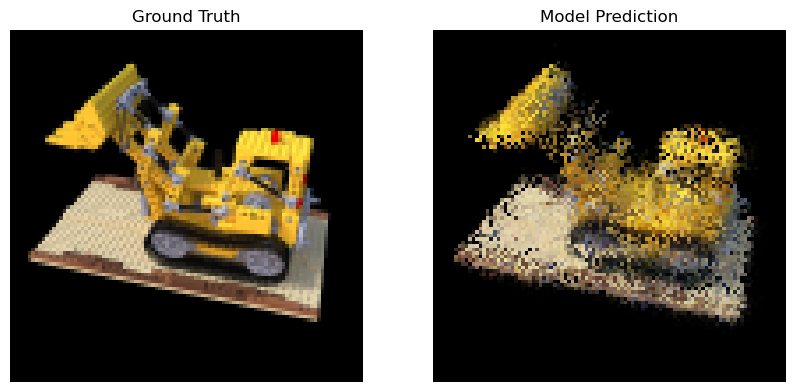

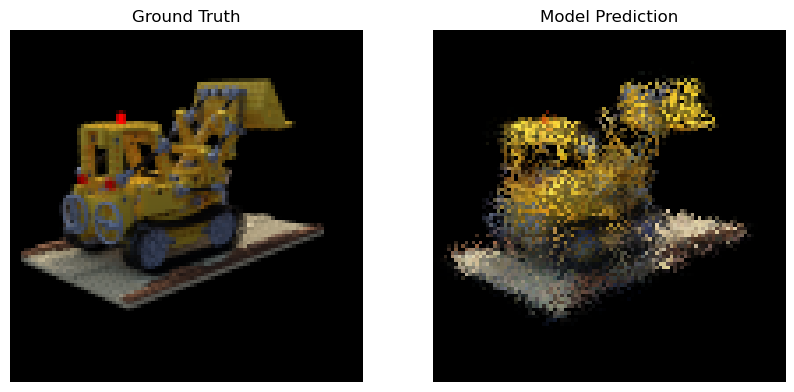

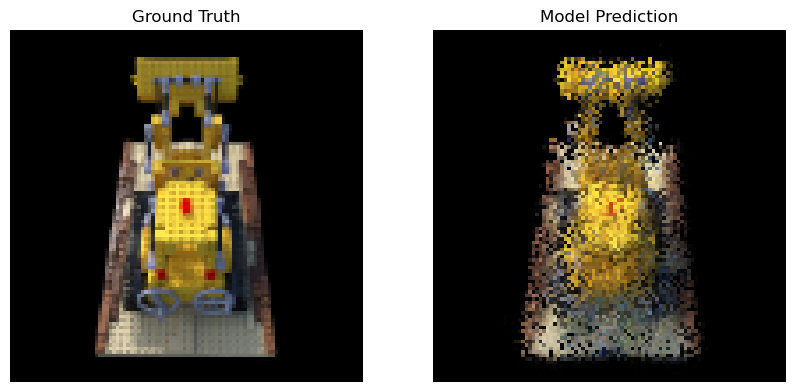

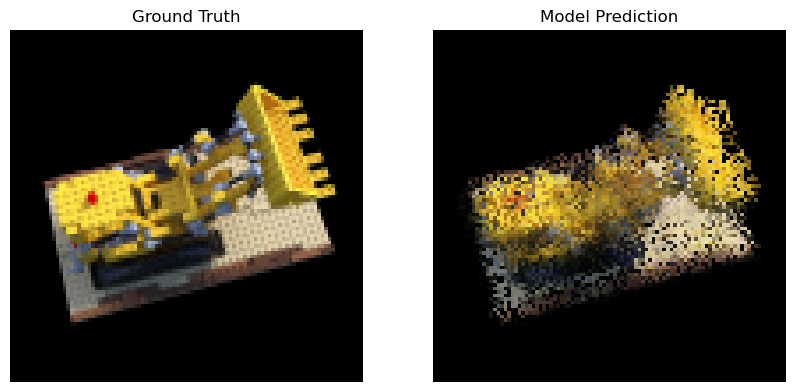

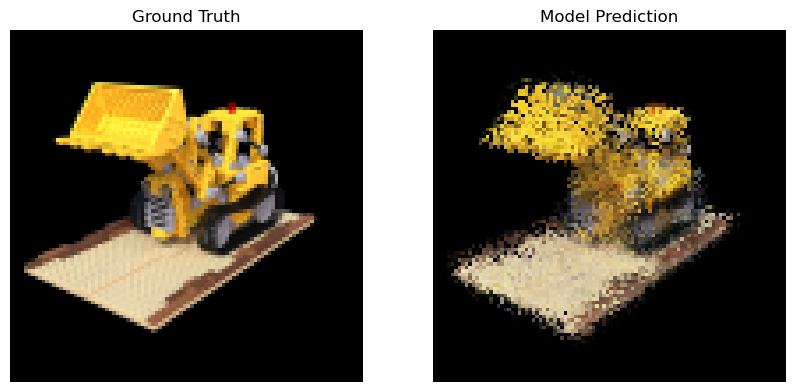

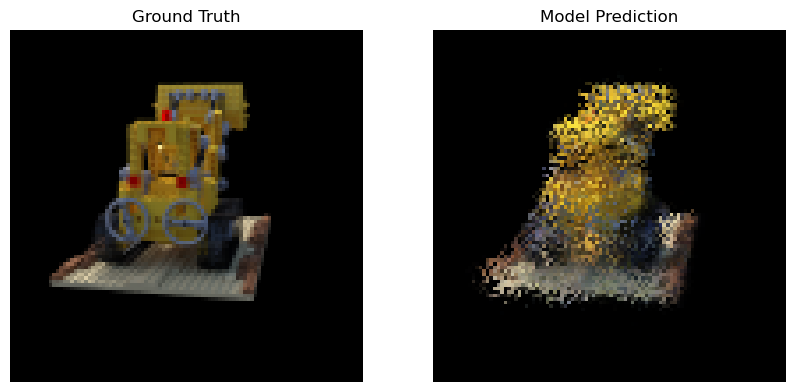

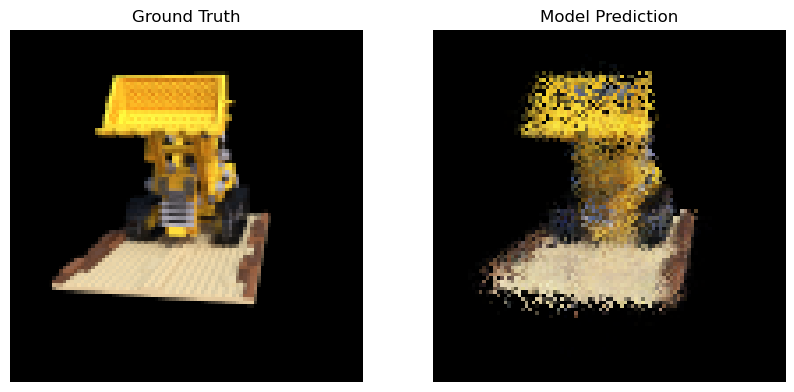

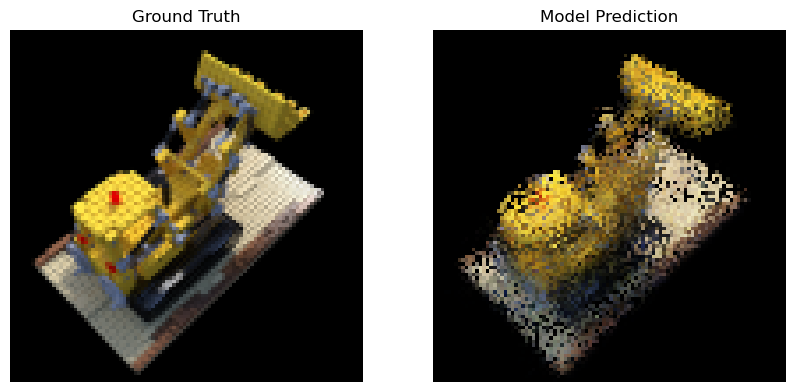

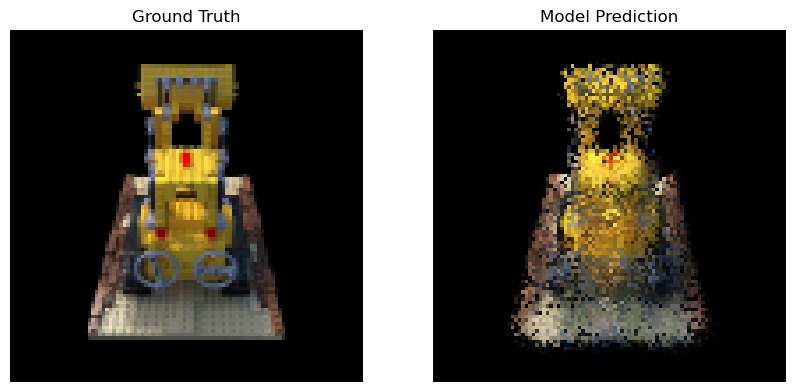

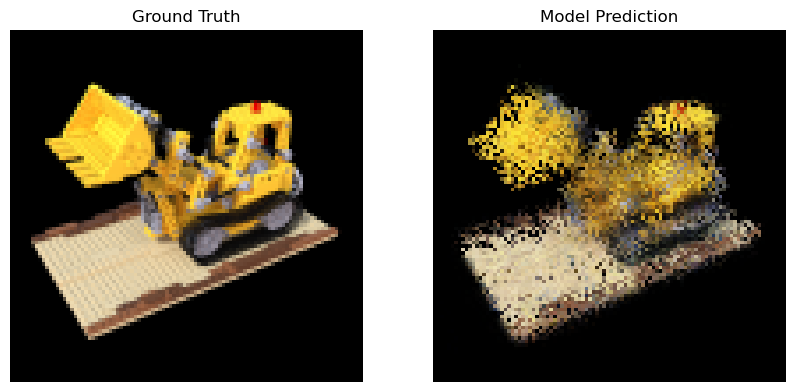

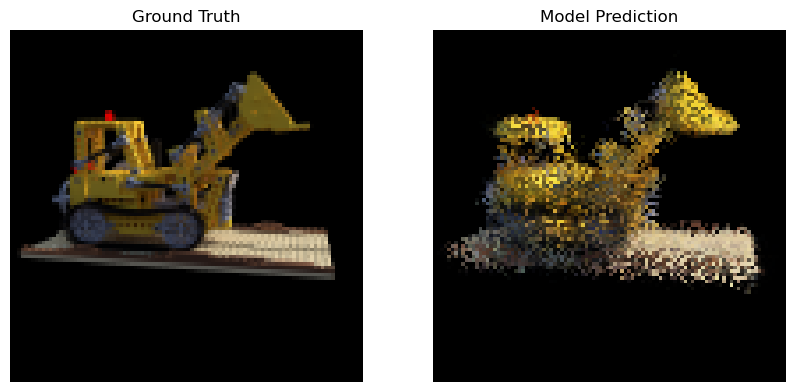

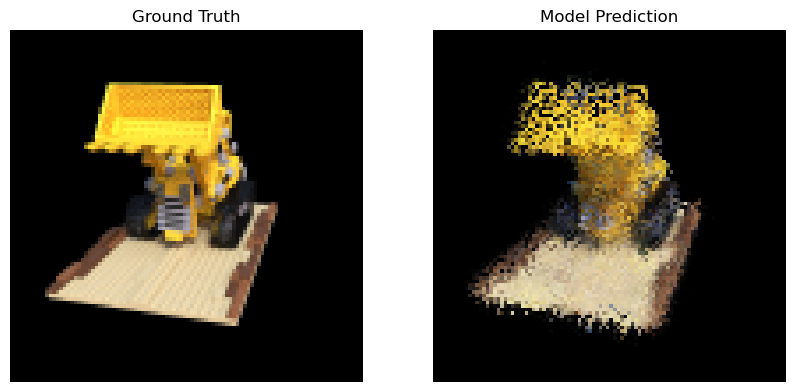

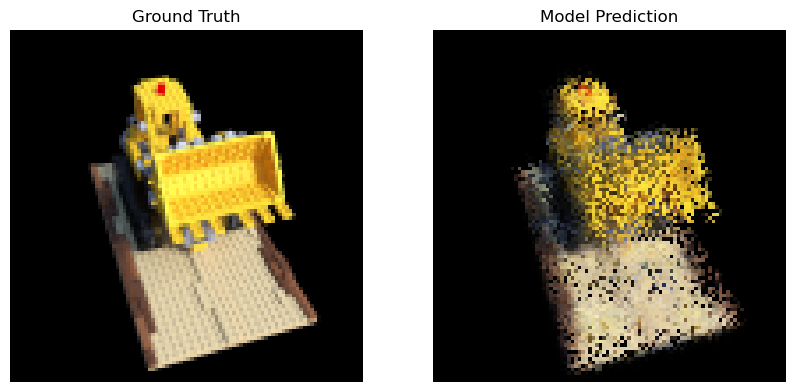

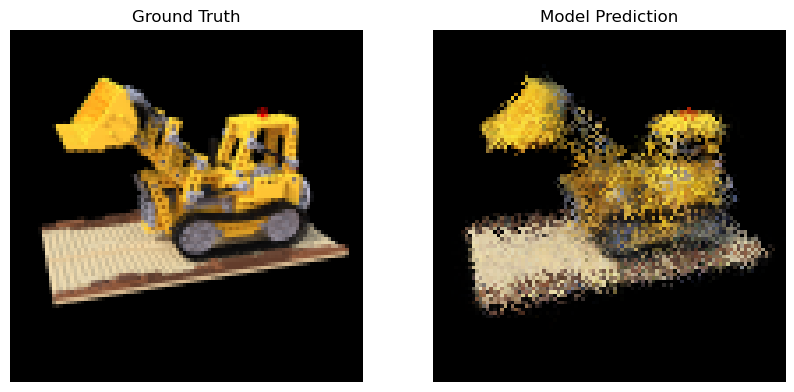

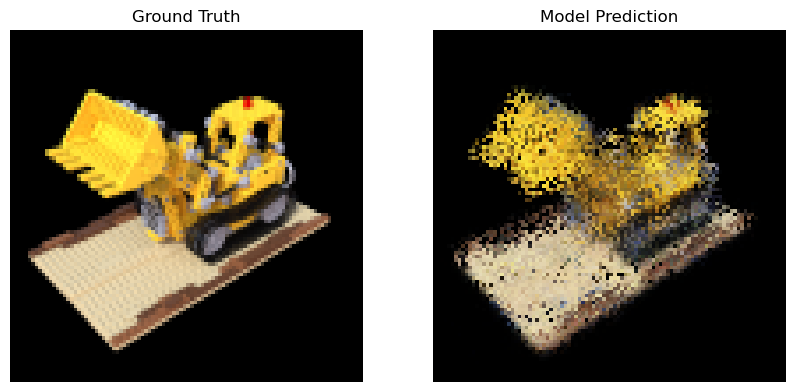

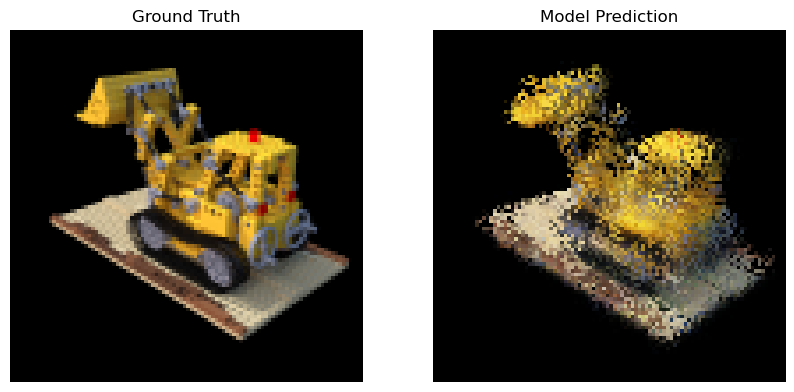

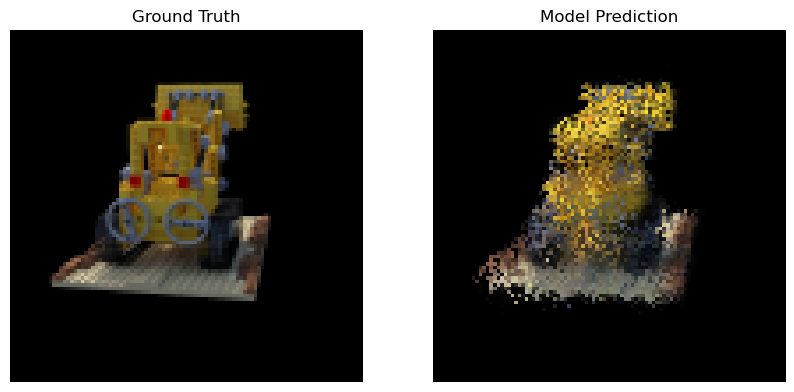

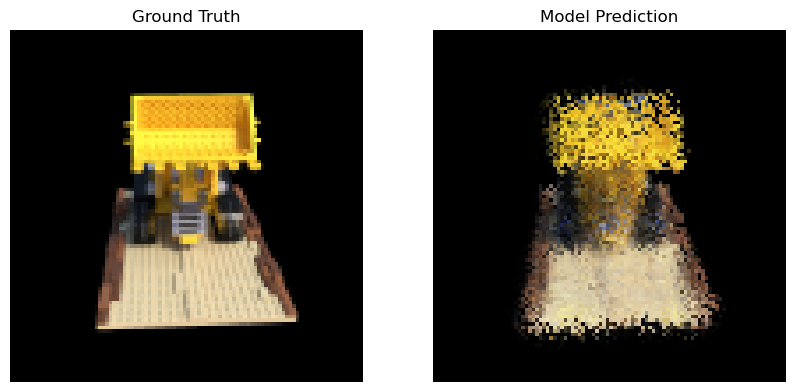

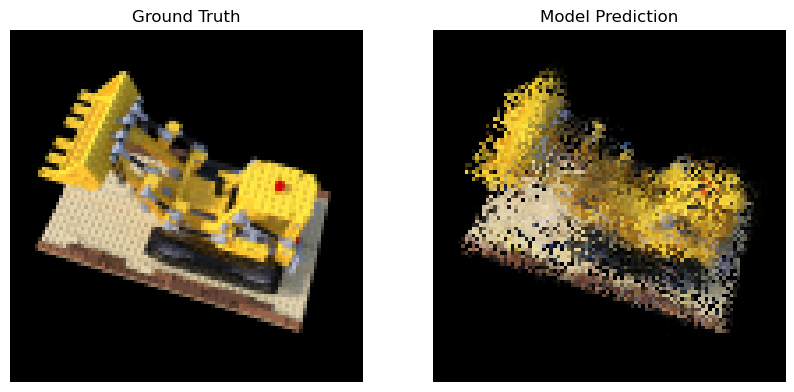

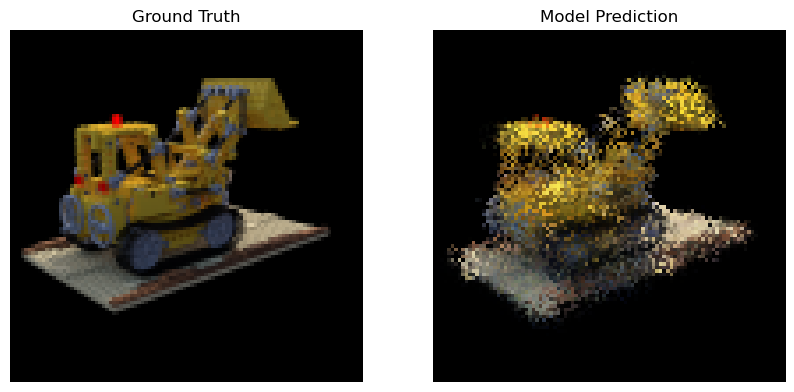

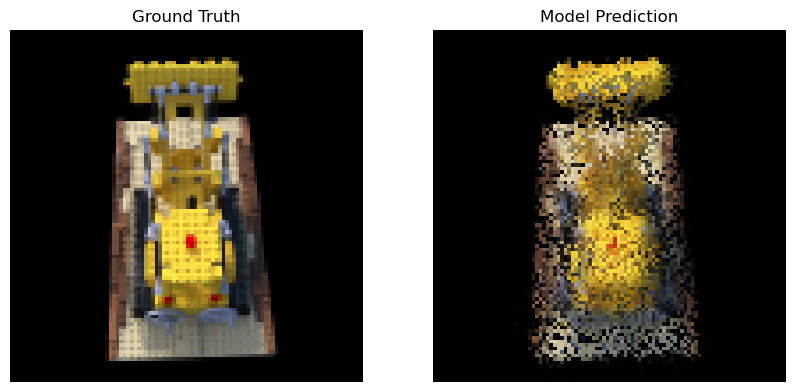

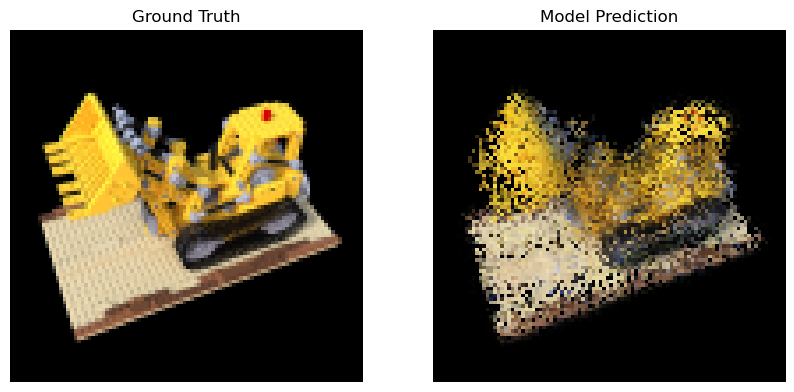

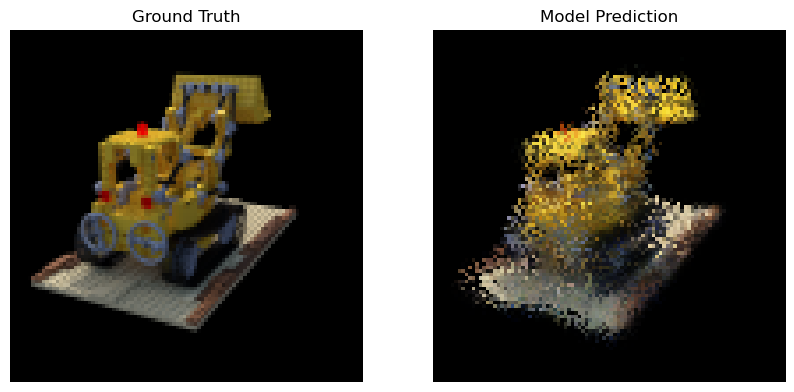

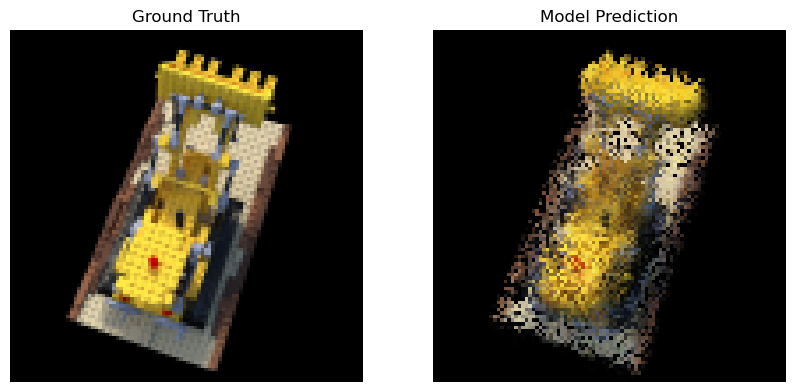

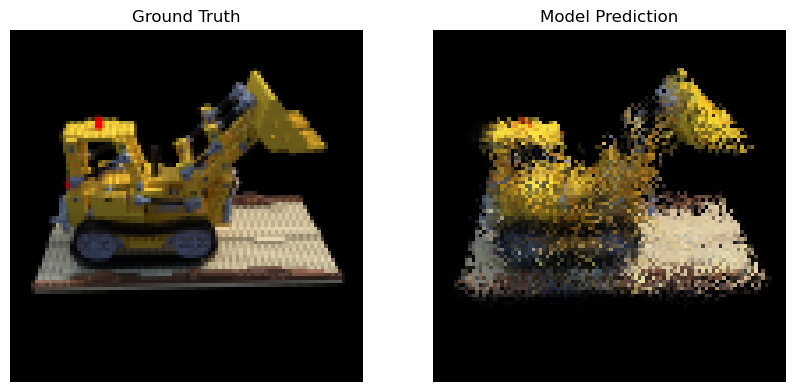

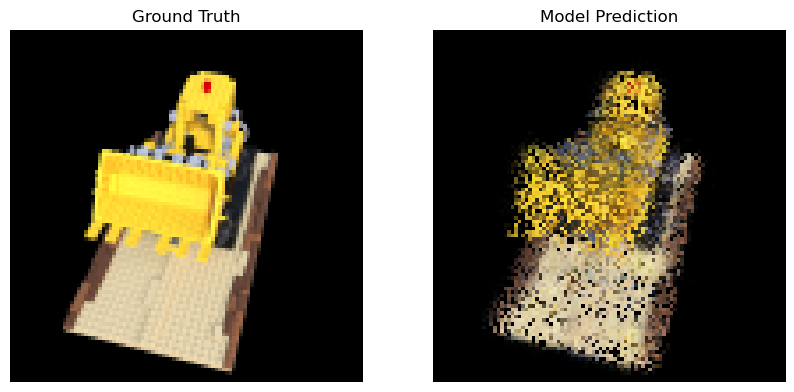

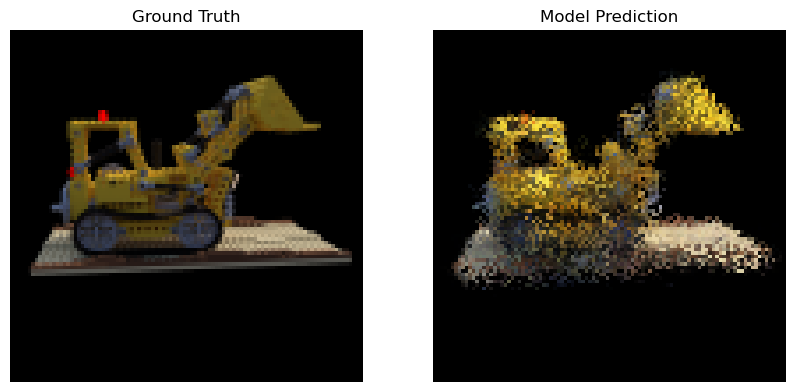

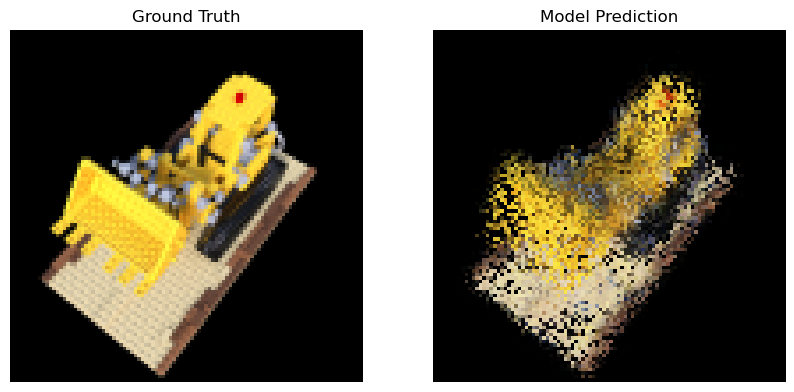

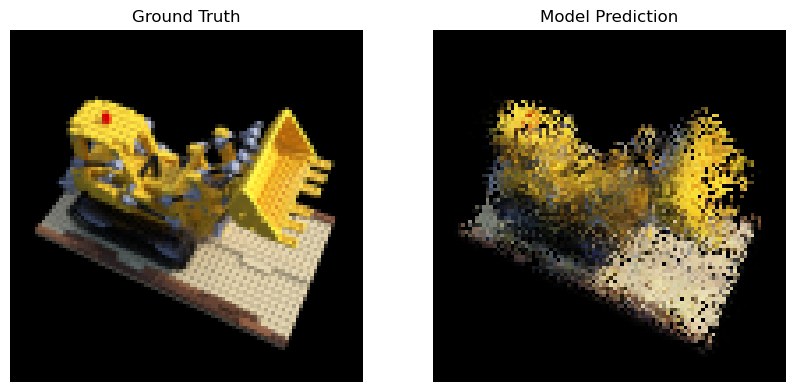

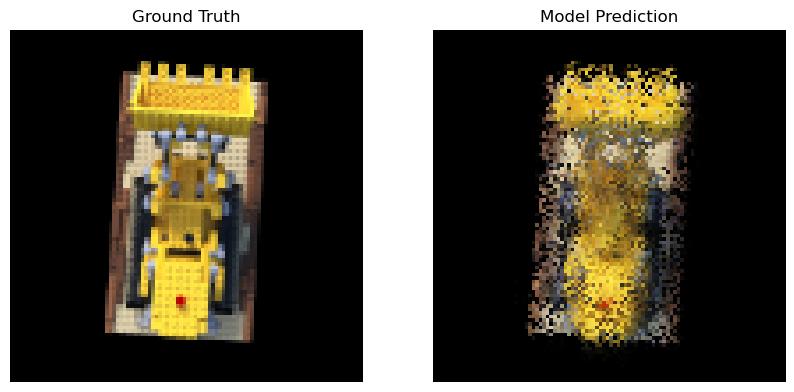

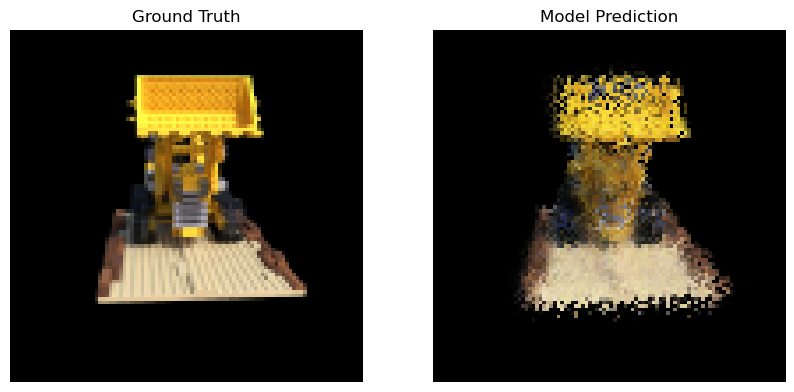

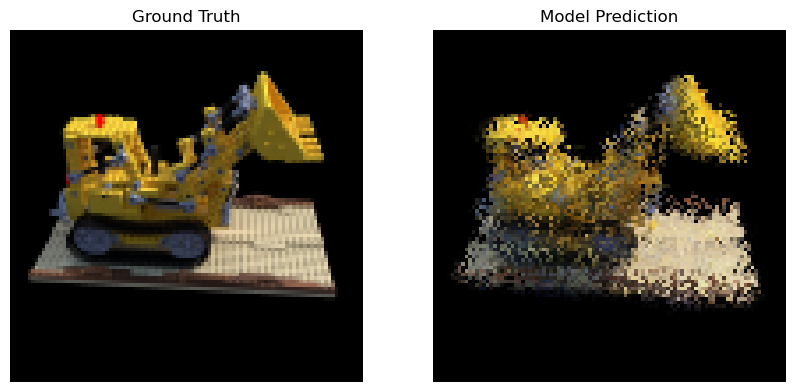

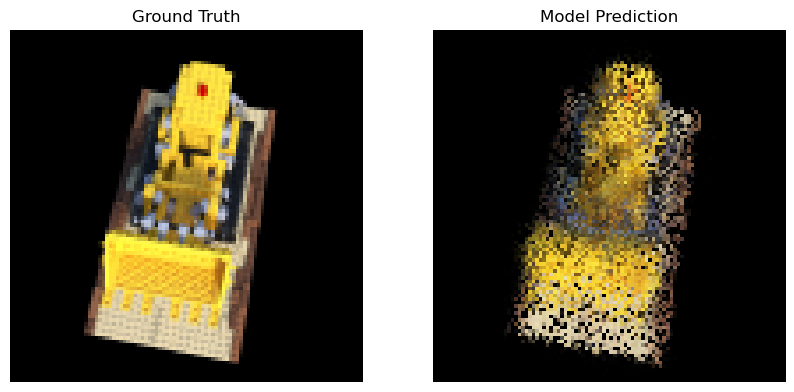

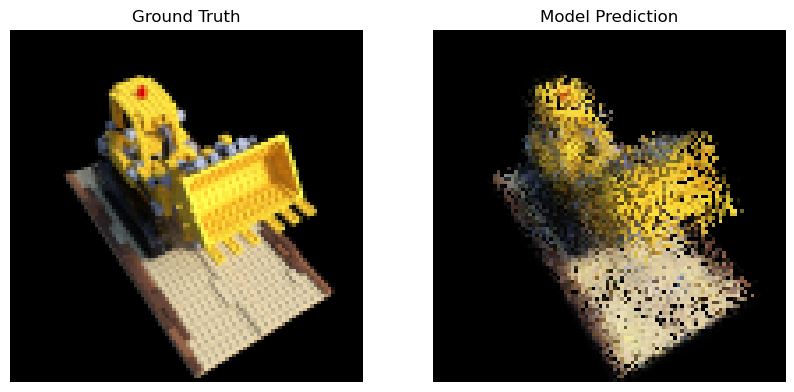

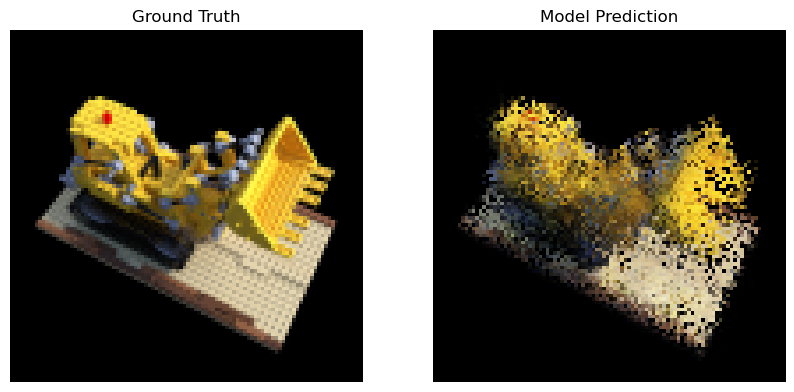

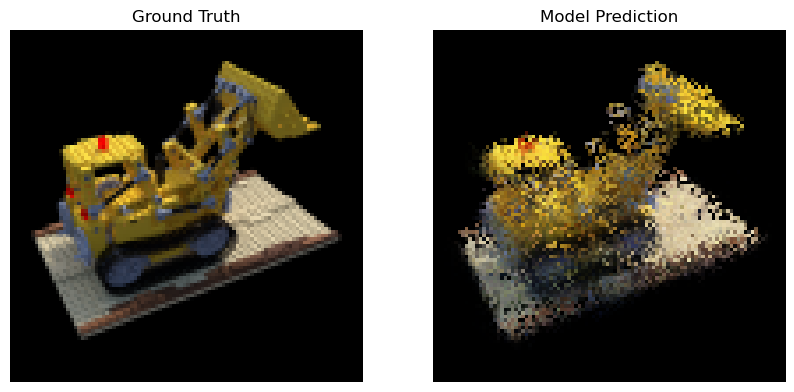

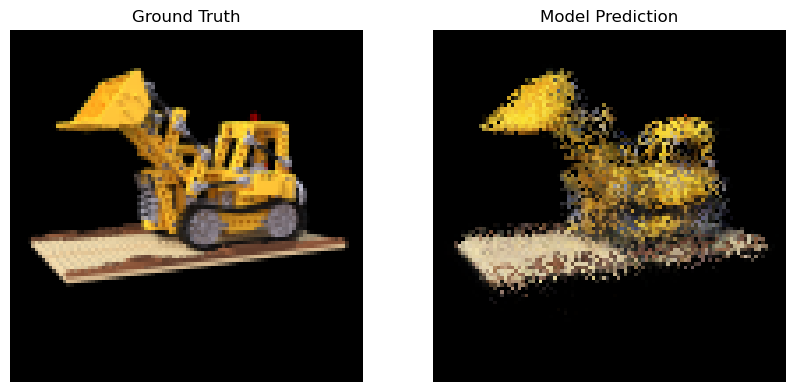

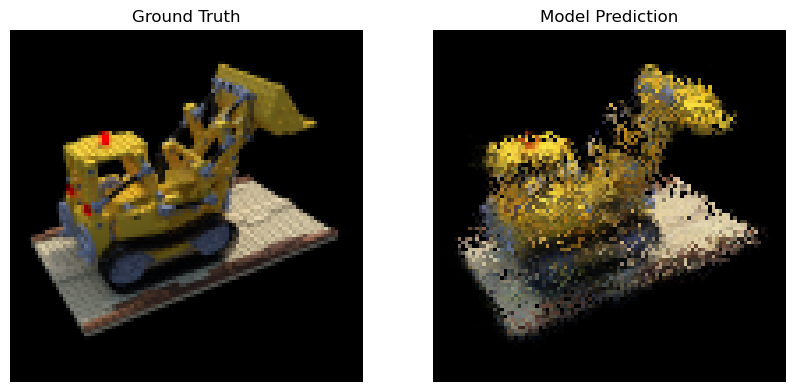

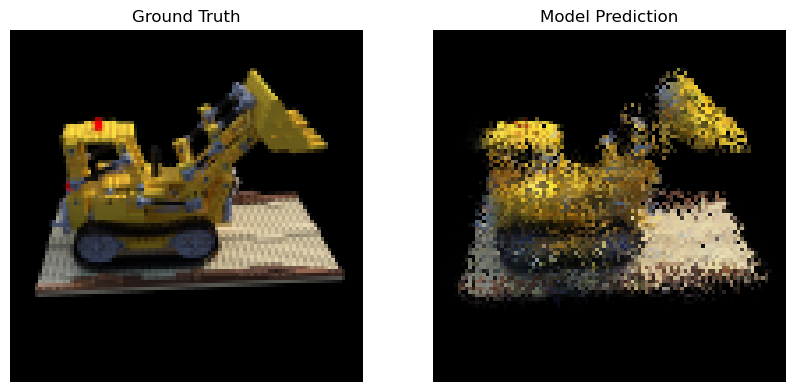

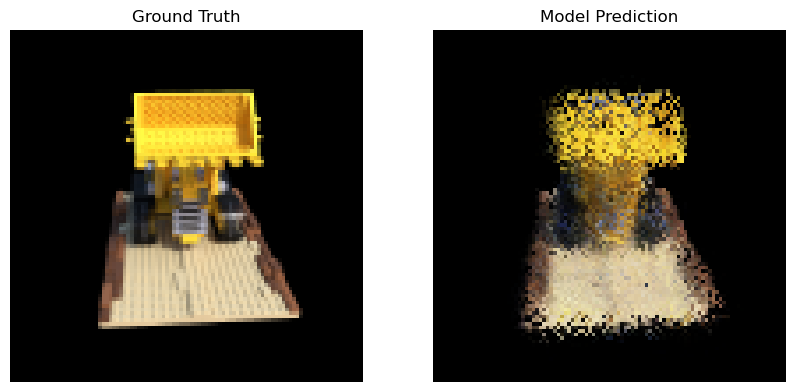

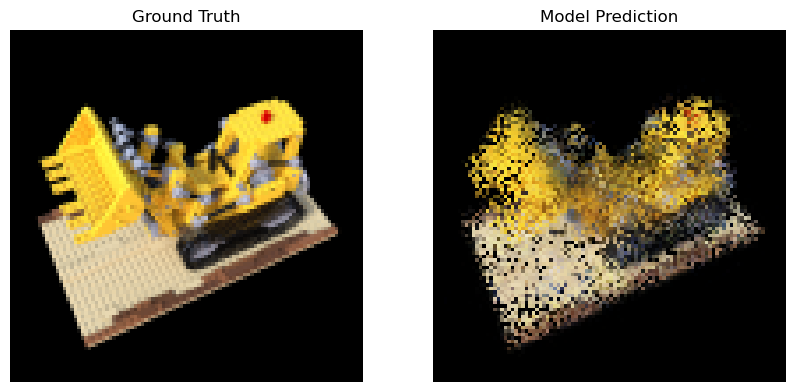

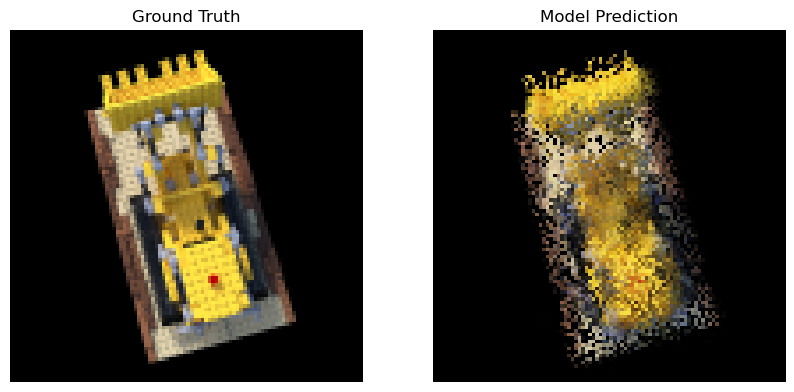

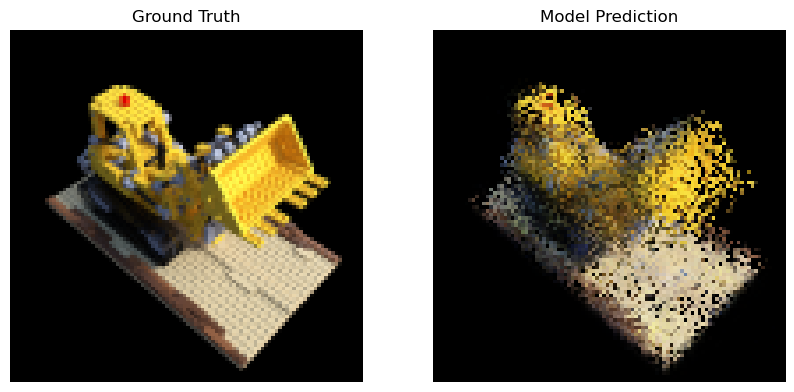

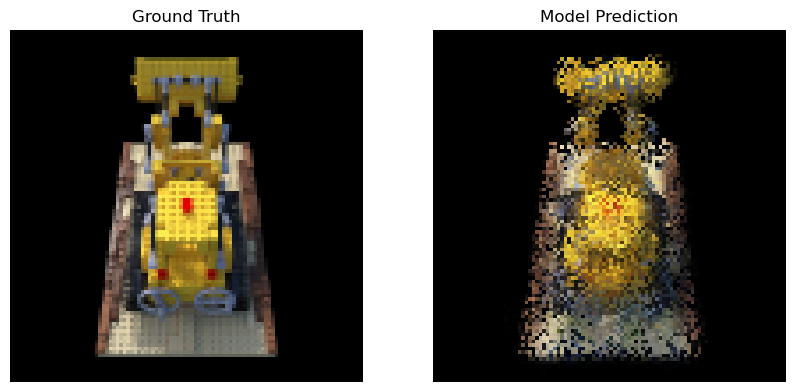

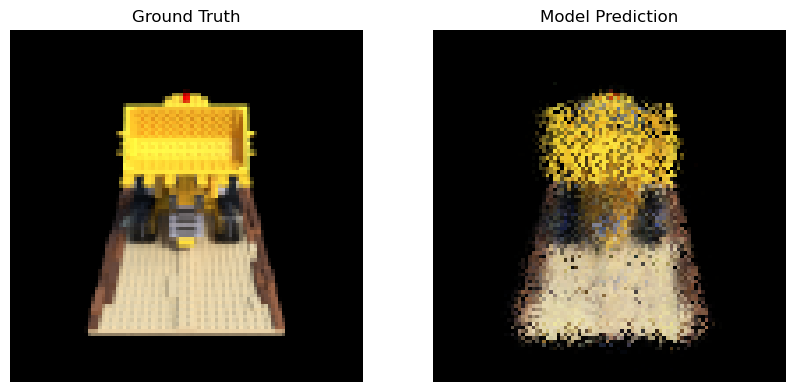

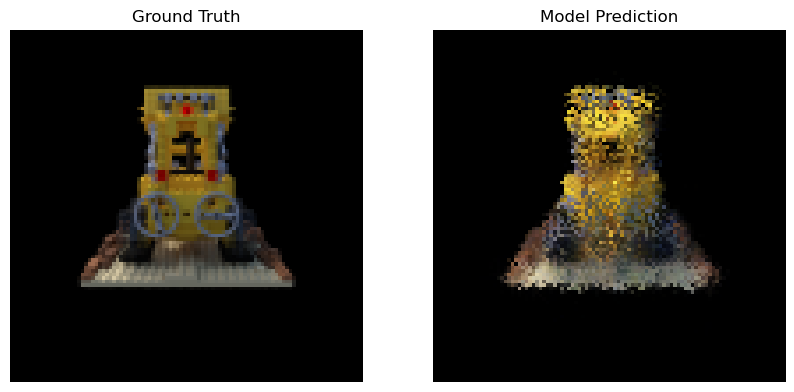

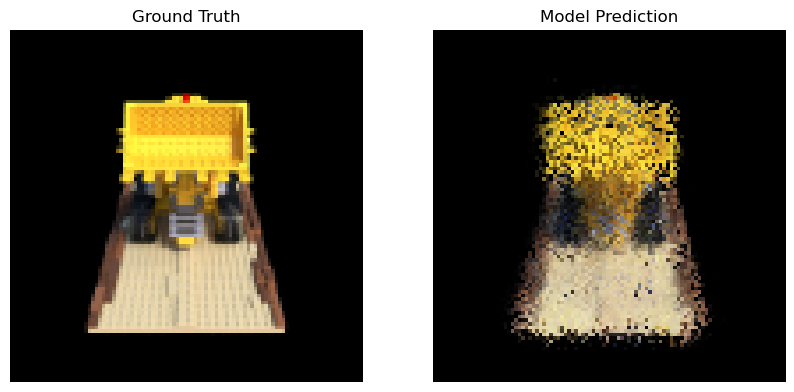

In [10]:
with torch.no_grad():
    for id,pose in enumerate(poses):
        pose = torch.tensor(poses[id]).unsqueeze(0)

        ray_direction, ray_origins, depth_vals, query_points = compute_rays(input_dummy, pose, focal, 2, 5, 10, device)
        
        output = model(position_encoding(query_points.view(-1, query_points.shape[-1]), 6))
        output, _, _ = render(output, query_points, ray_origins, depth_vals)
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        img = images[id]
        output = output.squeeze(0).numpy()
        # Display the first image
        ax[0].imshow(img)
        ax[0].set_title('Ground Truth')
        ax[0].axis('off')  # Hide the axes

        # Display the second image
        ax[1].imshow(output)
        ax[1].set_title('Model Prediction')
        ax[1].axis('off')  # Hide the axes

        # Show the plot
        plt.show()